# Image Classification

- CIFAR 10 Dataset (In-built)

#### CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. 
These images are divided into a training set of 50,000 images and a test set of 10,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Step 1: Import necessary libraries

In [6]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### Step 2: Load and preprocess the CIFAR-10 dataset

In [7]:
# Load Dataset 

(train_images,train_labels),(test_images,test_labels)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 141s 1us/step


In [8]:
train_images.shape

(50000, 32, 32, 3)

In [12]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
train_labels.shape

(50000, 1)

In [10]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
test_labels.shape

(10000, 1)

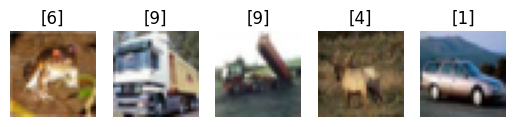

In [15]:
n=5
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(train_images[i])
    plt.title('{}'.format(train_labels[i]))
    plt.axis('off')
plt.show()


In [16]:
# Normalize pixel values to a range of [0,1]
train_images,test_images= train_images / 255.0, test_images / 255.0

In [17]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
# One hot encode the labels 
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


### Step 3: Create a deep learning model

In [20]:
# Create a deep learning model
#model = models.Sequential([
#    # Step 4: Convolutional Layers
#    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu'),

    # Step 5: Flatten the output
#    layers.Flatten(),

    # Step 6: Fully Connected Layers
#    layers.Dense(64, activation='relu'),
#    layers.Dense(10)  # 10 classes for CIFAR-10
#])


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization

model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10, 'softmax'))


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the model

In [25]:
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the model 
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Train the model

In [27]:
# train the model 
history = model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.3315 - loss: 1.8032 - val_accuracy: 0.5481 - val_loss: 1.2877
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5646 - loss: 1.2272 - val_accuracy: 0.6160 - val_loss: 1.0960
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6324 - loss: 1.0393 - val_accuracy: 0.6400 - val_loss: 1.0384
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6760 - loss: 0.9258 - val_accuracy: 0.6642 - val_loss: 0.9452
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7018 - loss: 0.8529 - val_accuracy: 0.6710 - val_loss: 0.9387
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7197 - loss: 0.7850 - val_accuracy: 0.6875 - val_loss: 0.8783
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7439 - loss: 0.7219 - val_accuracy: 0.6807 - val_loss: 0.9241
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7649 - loss: 0.67

### Step 6: Evaluate the model

In [28]:
# Evaluate the model 
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print(f"Test Accuracy:{test_accuracy}")
print(f"Test Loss:{test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7025 - loss: 0.8879
Test Accuracy:0.7028999924659729
Test Loss:0.8947345614433289


### Step 7: Visualize training history

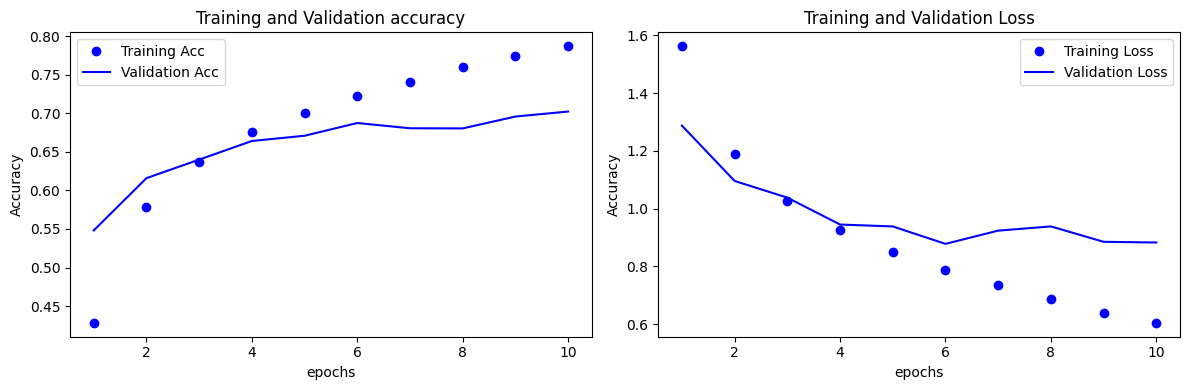

In [32]:
# Visualize the training history

def plot_training_history(history):
    # Extract training history metrics 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plot for accuracy and loss
    epochs = range(1,len(acc)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs,acc,'bo',label='Training Acc')
    plt.plot(epochs,val_acc,'b',label='Validation Acc')
    plt.title('Training and Validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_training_history(history)    

### Step 8: Visualize example predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


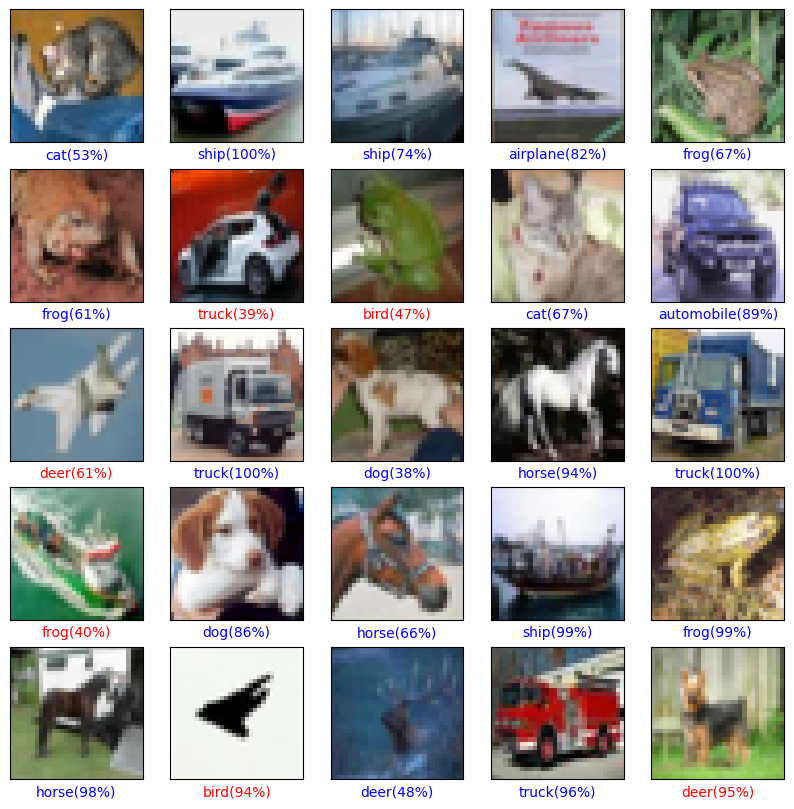

In [35]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_prediction():
    poredictions = model.predict(test_images)
    num_rows,num_col =5,5
    plt.figure(figsize=(10,10))
    for i in range(num_rows * num_col):
        plt.subplot(num_rows , num_col,i +1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i],cmap=plt.cm.binary)
        predicted_label = np.argmax(poredictions[i])
        true_label=np.argmax(test_labels[i])
        if predicted_label == true_label:
            color='blue'
        else:
            color='red'
        plt.xlabel(f"{class_names[predicted_label]}({100 * np.max(poredictions[i]):2.0f}%)",color=color)

# Call the function to plot example predictions
plot_example_prediction()